# Compute features and perform Machine Learning

1) In this example, we load a `SENTINEL image` and compute some features on this image :

- Gaussian filters of RGB NIR bands
- NDVI and NDVI filtered with Gaussian & Laplacian

2) Then, we load a `Field data tif image` that contains the different classes (only two in our situation).

3) We extract two numpy that are required in a random forest (with scikit)

4) We apply the model to the entire image


In [1]:
import rastereasy

# 1) Process sentinel image

### 1.1) Read image

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




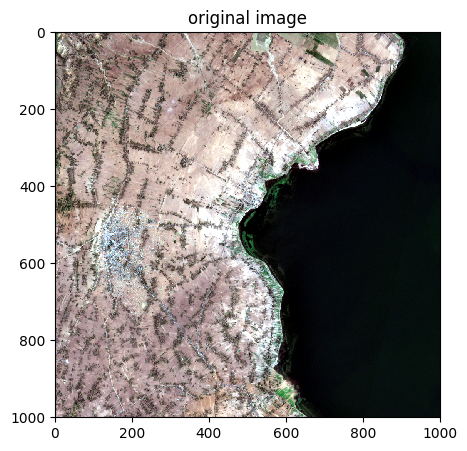

In [2]:
name_im='./data/demo/sentinel.tif'
names = {"CO" : 1,"B": 2,"G":3,"R":4,"RE1":5,"RE2":6,"RE3":7,"NIR":8,"WA":9,"SWIR1":10,"SWIR2":11,"SWIR3":12}
image=rastereasy.Geoimage(name_im, names=names)
image.info()
image.colorcomp(bands=['R','G','B'], extent='pixel',title='original image')

### 1.2) Extract R,G,B,NIR

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'R': 1, 'G': 2, 'B': 3, 'NIR': 4}




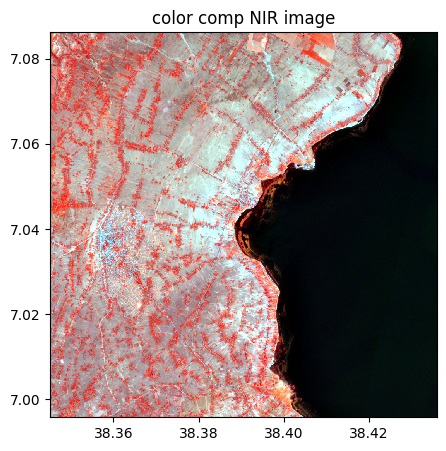

In [3]:
rgbnir=image.select_bands(['R','G','B','NIR'])
rgbnir.info()
rgbnir.colorcomp(bands=['NIR','G','B'], title = 'color comp NIR image')

### 1.3) Compute gaussian filters with `sigma=10` and `sigma=20`

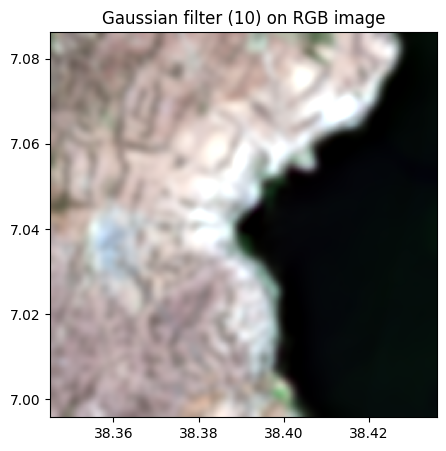

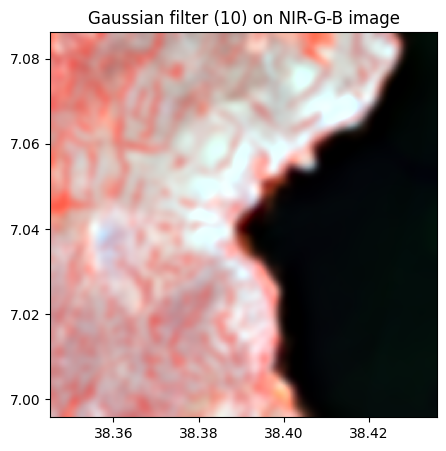

In [4]:
# sigma = 10
rgbnir_10=rgbnir.filter(method="gaussian",sigma=10)
rgbnir_10.colorcomp(bands=['R','G','B'], title = 'Gaussian filter (10) on RGB image')
rgbnir_10.colorcomp(bands=['NIR','G','B'], title = 'Gaussian filter (10) on NIR-G-B image')


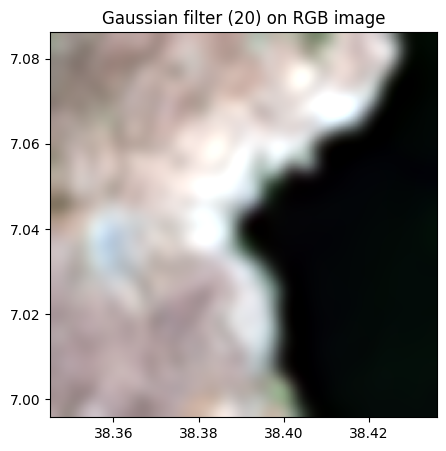

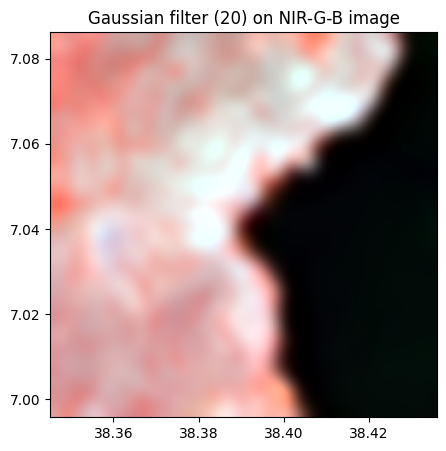

In [5]:
# sigma = 20
rgbnir_20=rgbnir.filter(method="gaussian",sigma=20)
rgbnir_20.colorcomp(bands=['R','G','B'], title = 'Gaussian filter (20) on RGB image')
rgbnir_20.colorcomp(bands=['NIR','G','B'], title = 'Gaussian filter (20) on NIR-G-B image')


### 1.4) Compute NDVI and two filtered version (gaussian `sigma=10` and `sigma=20`)

#### Extract R and NIR bands

In [6]:
r=rgbnir.select_bands('R')
nir=rgbnir.select_bands('NIR')

#### Compute and visu NDVI

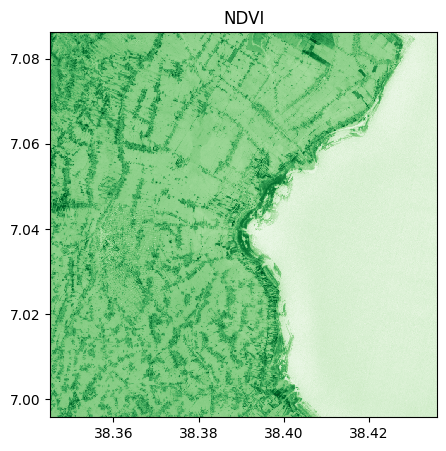

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: nan

- Given names for spectral bands: 
   {'NIR': 1}




In [7]:
ndvi=(nir-r)/(nir+r)
ndvi.visu(cmap='Greens', title="NDVI")
ndvi.info()

In [8]:
# As we can see, the name associated is the name of the 1st band involved in the operation
# For more consistency, we can change the name with :
ndvi.change_names({'NDVI':1})
ndvi.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: nan

- Given names for spectral bands: 
   {'NDVI': 1}




#### Gaussian filter of NDVI

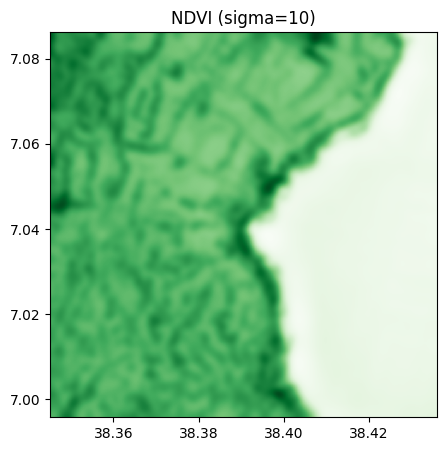

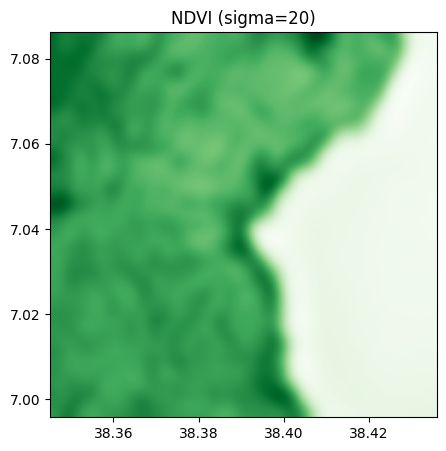

In [9]:
# sigma = 10 and 20
ndvi_10=ndvi.filter(method="gaussian",sigma=10)
ndvi_20=ndvi.filter(method="gaussian",sigma=20)
ndvi_10.visu(cmap='Greens', title="NDVI (sigma=10)")
ndvi_20.visu(cmap='Greens', title="NDVI (sigma=20)")

#### Laplacian filter of NDVI

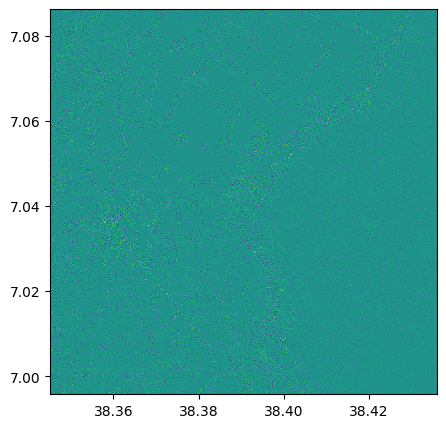

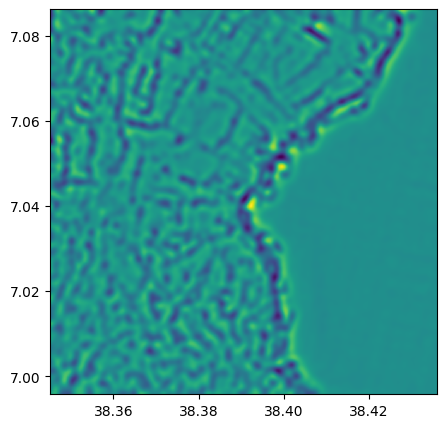

In [10]:
laplace_1=ndvi.filter(method = 'laplace')
laplace_1.visu()
laplace_2=ndvi.filter(method = 'laplace', pre_smooth_sigma=10)
laplace_2.visu()

# 2) Stack all features



We can now stack all features, in `rgbnir`, `rgbnir_10`, `rgbnir_20`, `ndvi`, `ndvi_10`, `ndvi_20`, `laplace_1`, `laplace_2`


In [11]:
im_features=rgbnir.stack(rgbnir_10).stack(rgbnir_20).stack(ndvi).stack(ndvi_10).stack(ndvi_20).stack(laplace_1).stack(laplace_2)
im_features.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 17
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'R_1_1_1': 1, 'G_1_1_1': 2, 'B_1_1_1': 3, 'NIR_1_1_1': 4, 'R_2_1_1': 5, 'G_2_1_1': 6, 'B_2_1_1': 7, 'NIR_2_1_1': 8, 'R_1_1': 9, 'G_1_1': 10, 'B_1_1': 11, 'NIR_1_1': 12, 'NDVI_1_1': 13, 'NDVI_2_1': 14, 'NDVI_1': 15, 'NDVI_2': 16, 'NDVI': 17}




As we can see, names are adapted. For more clarity, we can 

- change the names of each individual features (ex: `ndvi_10.change_names({'NDVI_10':1})` to make the naming of stacks 
- Reformat names with `im_features.reset_names()`


We decide here the second solution

In [12]:
im_features.reset_names()
im_features.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 17
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17}




# 3) Standardize the features

It is in general useful to standardize data for ML algorithms

In [13]:
im_features_std,scaler  = im_features.standardize()
# Check that mean is 0 and std 1
print(im_features_std.mean(axis='pixel'))
print(im_features_std.std(axis='pixel'))


[ 1.25112365e-16 -7.51185780e-17 -5.80371307e-17 -5.67297320e-17
  2.00537897e-14  3.86009447e-15  2.83656618e-14 -2.11864517e-14
 -4.87677312e-14  8.21022468e-14  6.18409217e-14  4.41988277e-14
 -3.19445860e-13  9.11597908e-15  1.28763418e-14  2.05613304e-19
  1.24913413e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 4) Read the classes data

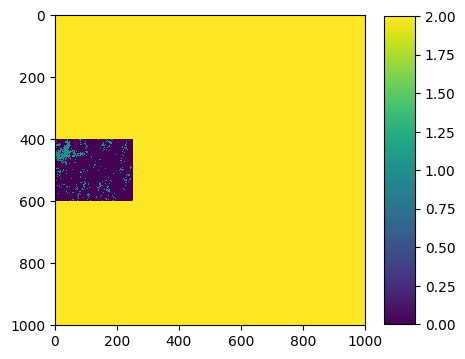

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: uint8
- Projection system: EPSG:32637
- Nodata: 2.0

- Given names for spectral bands: 
   {'1': 1}




In [14]:
name_data_classes = './data/demo/field_vegetation.tif'
ground_truth = rastereasy.Geoimage(name_data_classes)
ground_truth.visu(extent='pixel',colorbar=True)
ground_truth.info()

Here, we have 3 labels : 0,1,2:

- 0 corresponds to bare soils
- 1 corresponds to vegetation
- 2 corresponds to no data

We then have to extract only labels with 0 and 1 for the training (and not care with label 2).

To do this, we have the function `rastereasy.extract_numpy_tables`

# 4) Extract two numpy that are required in a  scikit ML technique

`scikit`requires `(X,y)` numpy tables:

- `X` being the data, of size `(N x f)` (`N`: number of data and `f`: number of features)
- `y` being the outputs, of size `(N,)` that contains the outputs (values, name of the class, ...) 


In [15]:
help(rastereasy.extract_numpy_tables)

Help on function extract_numpy_tables in module rastereasy.rastereasy:

extract_numpy_tables(data, outputs, label=None)
    Extract paired NumPy tables (features and outputs) for machine learning.
    
    This function converts raster data stored in `Geoimage` objects into two
    NumPy arrays: one containing the input features (X), and one containing
    the corresponding outputs/labels (y). Optionally, it can filter the
    dataset to only include samples corresponding to one or multiple label
    values.
    
    Parameters
    ----------
    data : Geoimage
        A `rastereasy.Geoimage` containing the input features
        (e.g., multispectral bands).
    outputs : Geoimage
        A `rastereasy.Geoimage` containing the outputs/labels
        (e.g., classes or quantitative values).
    label : int or list of int, optional (default=None)
        If provided, only the samples corresponding to this label value
        (or list of values) in `outputs` will be extracted.
    
    Re

In [16]:
# We are interested in labels 0 and 1 for training
X,y=rastereasy.extract_numpy_tables(im_features_std, ground_truth, label=[0,1])
print(X.shape)
print(y.shape)

(50000, 17)
(50000,)


# 5) Train our favorite ML algorithm

Now we can apply a ML algorithm on data. Here we use a random forest

Training

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

# 6) Apply our favorite ML algorithm on a Geoimage


To apply the trained model on a Geoimage, we have the fonction `predict`

In [18]:
help(im_features_std.predict)

Help on method predict in module rastereasy.rastereasy:

predict(model, bands=None) method of rastereasy.rastereasy.Geoimage instance
    Apply a pre-trained machine learning model to the image.
    
    This method applies a machine learning model (such as one created by kmeans())
    to the image data, creating a new classified or transformed image.
    
    Parameters
    ----------
    model : scikit model or tuple
        If tuple, it must containi (ml_model, scaler) where:
        - ml_model: A trained scikit-learn model with a predict() method
        - scaler: The scaler used for standardization (or None if not used)
    bands : list of str or None, optional
        List of bands to use as input for the model. If None, all bands are used.
        Default is None.
    
    Returns
    -------
    Geoimage
        A new Geoimage containing the model output
    
    Examples
    --------
    >>> # Train a model on one image and apply to another
    >>> classified, model = referenc

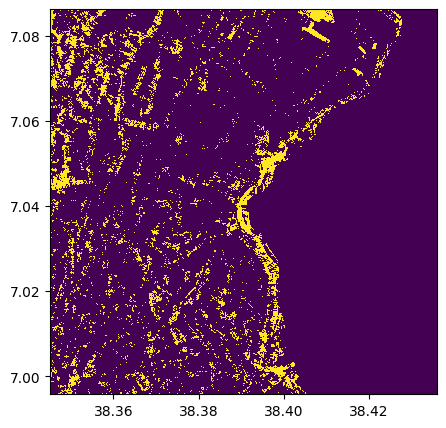

In [19]:
# As we can see in the help, we can apply it directly on the image with standardized bands
vegetation = im_features_std.predict(clf)
vegetation.visu()


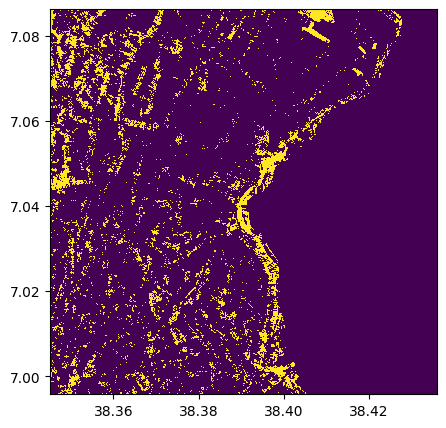

In [20]:
# We can apply it directly on the image without standardized bands, and give the scaler issued from standardization
vegetation = im_features.predict((clf,scaler))
vegetation.visu()
